In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

llm=ChatGroq(model_name="qwen/qwen3-32b")
result=llm.invoke("What is the capital of India?")
result

C:\Users\bhatt\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content='<think>\nOkay, so the user is asking for the capital of India. Let me think. I remember learning about Indian cities in school. The main cities are things like Mumbai, Delhi, Kolkata, etc. But which one is the capital? Wait, isn\'t the capital New Delhi? No, wait, maybe it\'s Delhi. I think Delhi is the capital. But sometimes people refer to New Delhi as the capital. Let me confirm.\n\nDelhi is a city in northern India, and New Delhi is a part of Delhi. I think New Delhi is where the government buildings are located. The Indian government\'s official website probably says the capital is New Delhi. Wait, but sometimes in common usage, people just say Delhi as the capital. For example, when you look up the capital of India, it\'s listed as New Delhi. But maybe the question is expecting a simpler answer. Let me check some facts. The capital of India is New Delhi, which is a part of the National Capital Territory of Delhi. So the correct answer would be New Delhi. But ma

In [7]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
from IPython.display import Image,display

#State
class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [10]:
#Nodes
def generate_chracters(state):
    print("Generating characters for the story")
    characters=llm.invoke(f"Generate two characters for the story and brief trait for a story sbout {state['topic']}")
    return {"characters":characters.content}

def generate_settings(state):
    print("Generating settings for the story")
    settings=llm.invoke(f"Generate a setting for the story about {state['topic']}")
    return {"settings":settings.content}

def generate_premises(state):
    print("Generating premises for the story")
    premises=llm.invoke(f"write a one sentence premise for the story about {state['topic']}")
    return {"premises":premises.content}

def combile_elements(state):
    print("Combiling elements for the story")
    story_intro=llm.invoke(f"Write a story intro for the story about {state['topic']} with characters {state['characters']} and settings {state['settings']} and premises {state['premises']}")
    return {"story_intro":story_intro.content}



In [12]:
#Build graph
graph=StateGraph(State)
graph.add_node("character",generate_chracters)
graph.add_node("setting", generate_settings)
graph.add_node("premises", generate_premises)
graph.add_node("combine", combile_elements)

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


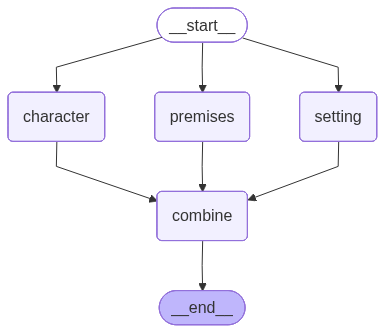

In [14]:
#add edges
graph.add_edge(START,"character")
graph.add_edge(START, "setting")
graph.add_edge(START, "premises")
graph.add_edge("character", "combine")
graph.add_edge("setting", "combine")
graph.add_edge("premises", "combine")
graph.add_edge("combine", END)

compiled_graph=graph.compile()
graph_image=compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [15]:
state = {
    "topic": "time travel"
}
result=compiled_graph.invoke(state)
print(result["story_intro"])

Generating characters for the story
Generating premises for the story
Generating settings for the story
Combiling elements for the story
<think>
Okay, let me start by understanding what the user needs. They want a story intro about time travel with two characters, settings, and a premise. They provided examples for each section, so I need to follow that structure. 

First, the characters. The user created Dr. Elara Voss and Kael Ren with specific traits. I need to make sure my characters are distinct but complementary. Maybe one is a scientist and the other someone with a personal stake, like a historian or a journalist. Let me think of names. Maybe a female protagonist and a male? Or vice versa? Let's go with a female scientist and a male historian.

Dr. Elara Voss is a physicist with guilt, so maybe my character could be someone who made a mistake in the past. Let's say she's a quantum physicist who accidentally caused a disaster. Her trait could be methodical but haunted. Then the s